In [5]:
import numpy as np
import pandas as pd

import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('insurance.csv')

EDA

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.shape



(1338, 7)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

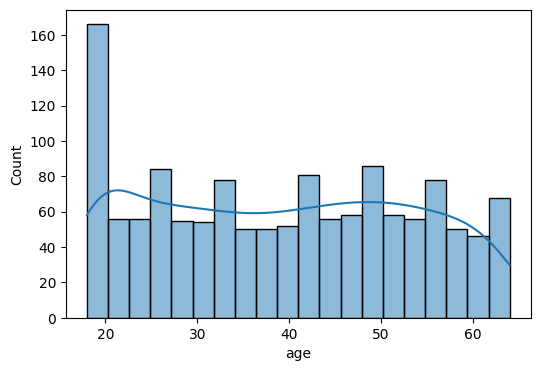

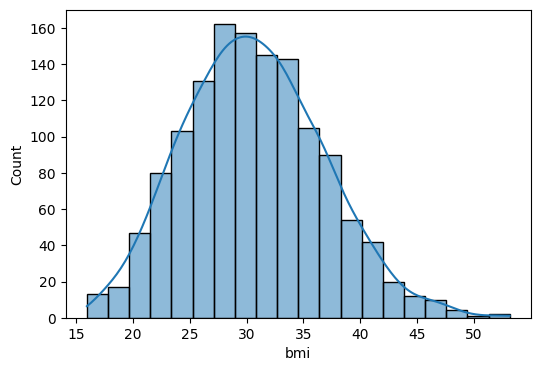

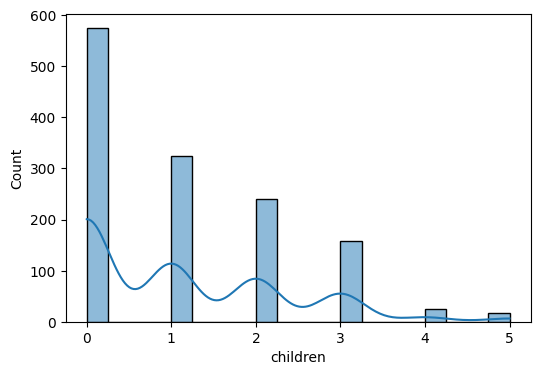

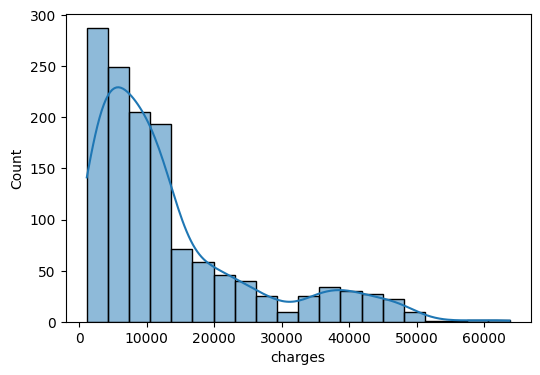

In [14]:
numeric_colums = ['age', 'bmi', 'children','charges']
for col in numeric_colums:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=20)

<Axes: xlabel='children', ylabel='count'>

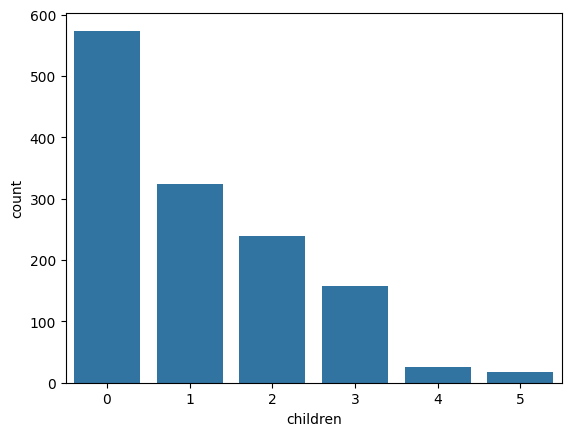

In [15]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

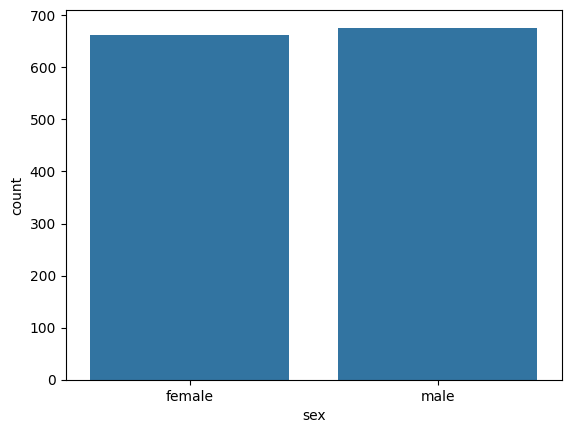

In [16]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

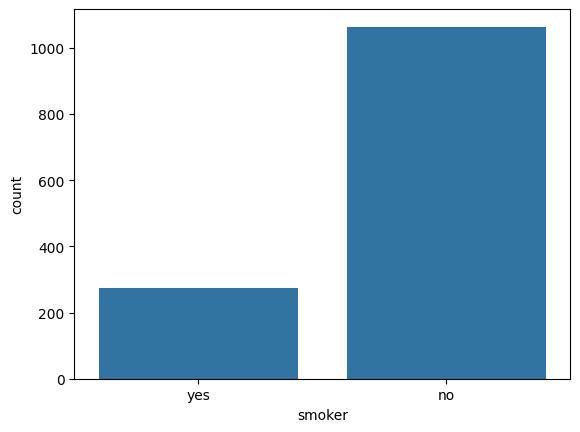

In [17]:
sns.countplot(x=df['smoker'])

<Axes: xlabel='region', ylabel='count'>

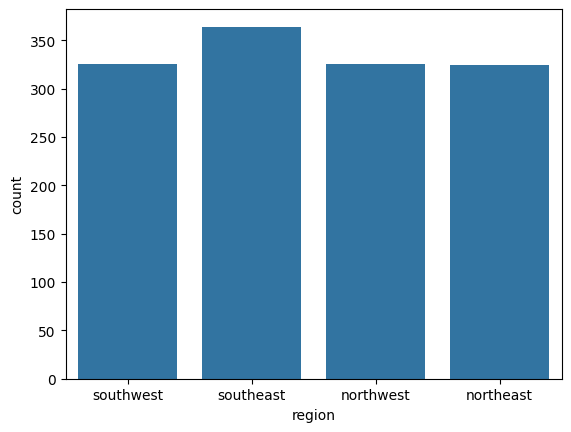

In [18]:
sns.countplot(x=df['region'])

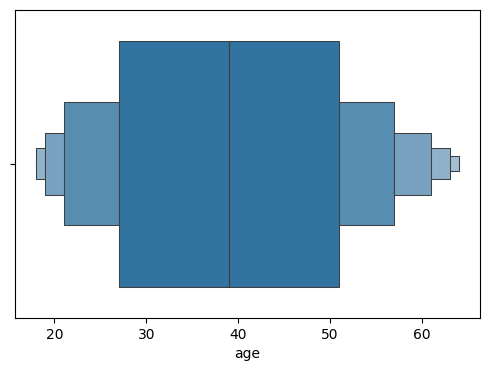

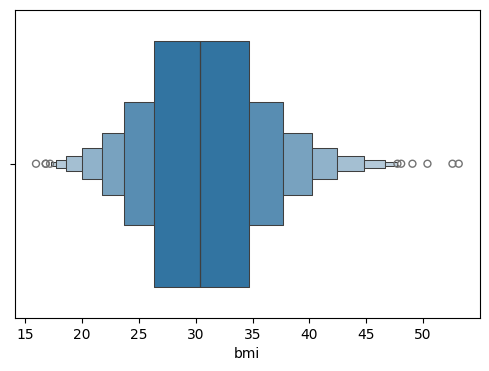

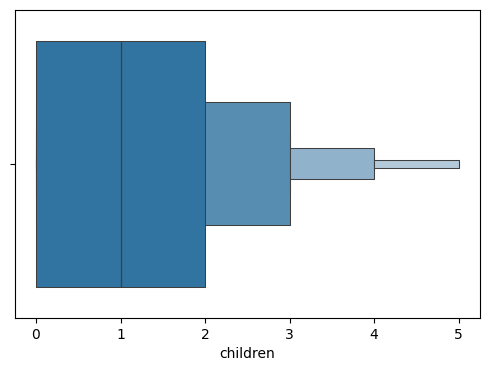

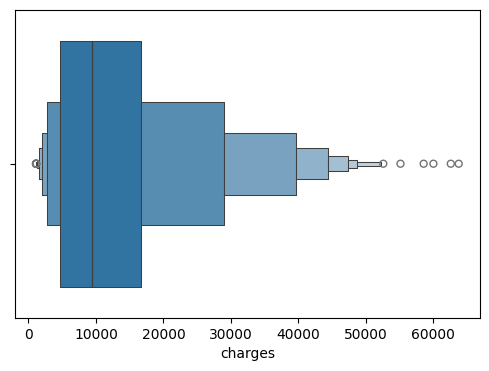

In [19]:
for col in numeric_colums:
    plt.figure(figsize=(6,4))
    sns.boxenplot(x=df[col])

<Axes: >

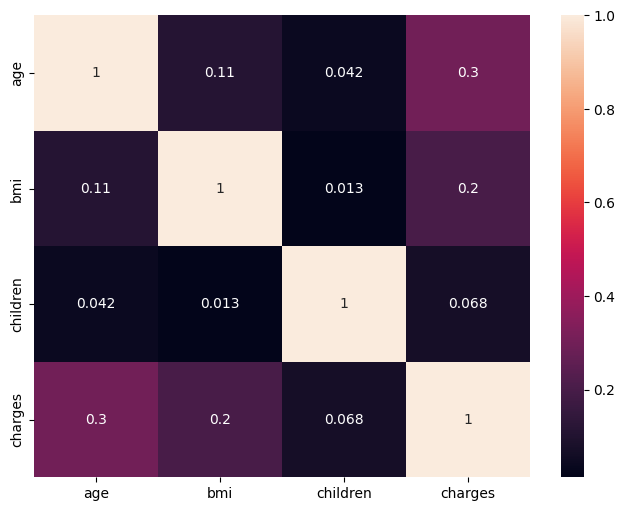

In [20]:

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

Data Cleaning & Preprocessing

In [21]:
df_cleaned = df.copy()

In [22]:
df_cleaned


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
df_cleaned.drop_duplicates(inplace=True)

In [24]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [25]:
df_cleaned['sex'] = df_cleaned['sex'].map({"male":0 , "female":1})

In [26]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [27]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"no" : 0 , "yes" : 1})

In [28]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [29]:
df_cleaned.rename(columns={'smoker' :'is_smoker'}, inplace=True)

In [30]:
df_cleaned

,age,sex,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [31]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [32]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'], drop_first=True)

In [33]:
df_cleaned.head()

,age,sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [34]:
df_cleaned = df_cleaned.astype(int)

In [35]:
df_cleaned

,age,sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


Feature Engineering & Extraction

<Axes: xlabel='bmi', ylabel='Count'>

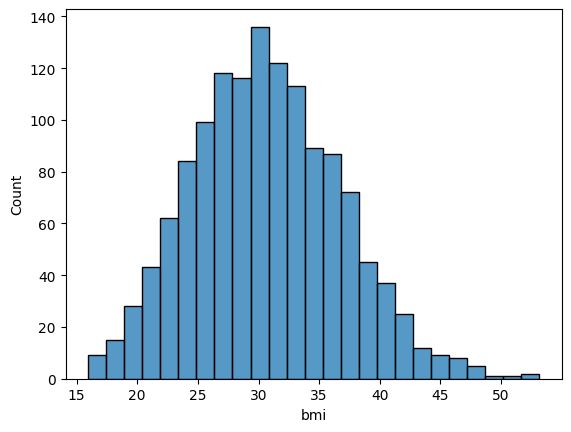

In [36]:
sns.histplot(df['bmi'])

<Axes: xlabel='age', ylabel='Count'>

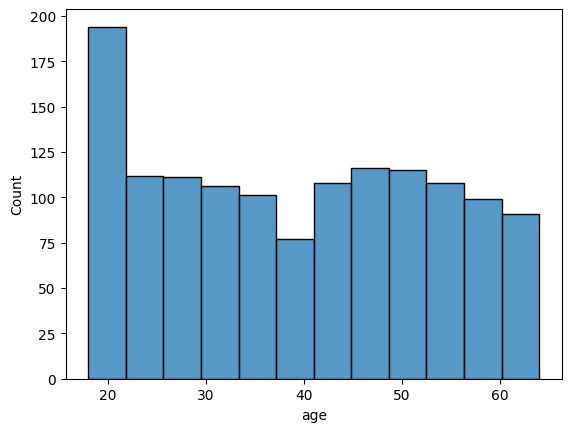

In [37]:
sns.histplot(df['age'])

In [38]:
df_cleaned['bmi_category']= pd.cut(
    df_cleaned['bmi'],
    bins = [0, 8.5, 24.9 , 29.9, float('inf')],
    labels= ['Underweight', 'Normal', 'Overweight', 'Obese']
    )

In [39]:
df_cleaned

,age,sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [40]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['bmi_category'], drop_first=True)

In [41]:
df_cleaned

,age,sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [42]:
df_cleaned = df_cleaned.astype(int)

In [43]:
df_cleaned.head()

,age,sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [44]:
df_cleaned['age_group'] = pd.cut(
    df_cleaned['age'],
    bins= [ 0, 16, 30, 45, float('inf')],
    labels=["Child", "Young adults", "Middle-aged Adults", "Old-age Adults"]
)

In [45]:
df_cleaned

,age,sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,age_group
0,19,1,27,0,1,16884,0,0,1,0,1,0,Young adults
1,18,0,33,1,0,1725,0,1,0,0,0,1,Young adults
2,28,0,33,3,0,4449,0,1,0,0,0,1,Young adults
3,33,0,22,0,0,21984,1,0,0,1,0,0,Middle-aged Adults
4,32,0,28,0,0,3866,1,0,0,0,1,0,Middle-aged Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1,Old-age Adults
1334,18,1,31,0,0,2205,0,0,0,0,0,1,Young adults
1335,18,1,36,0,0,1629,0,1,0,0,0,1,Young adults
1336,21,1,25,0,0,2007,0,0,1,0,1,0,Young adults


In [46]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['age_group'], drop_first=True)

In [47]:
df_cleaned = df_cleaned.astype(int)

In [48]:
df_cleaned.head()

,age,sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,age_group_Young adults,age_group_Middle-aged Adults,age_group_Old-age Adults
0,19,1,27,0,1,16884,0,0,1,0,1,0,1,0,0
1,18,0,33,1,0,1725,0,1,0,0,0,1,1,0,0
2,28,0,33,3,0,4449,0,1,0,0,0,1,1,0,0
3,33,0,22,0,0,21984,1,0,0,1,0,0,0,1,0
4,32,0,28,0,0,3866,1,0,0,0,1,0,0,1,0


In [49]:
df_cleaned.columns

Index(['age', 'sex', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
       'age_group_Young adults', 'age_group_Middle-aged Adults',
       'age_group_Old-age Adults'],
      dtype='object')

In [50]:
from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [51]:
df_cleaned.head()

,age,sex,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,age_group_Young adults,age_group_Middle-aged Adults,age_group_Old-age Adults
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,1,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,1,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,1,0,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,0,1,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0,1,0


In [52]:
from scipy.stats import pearsonr

selected_features = [ 'age', 'sex', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
       'age_group_Young adults', 'age_group_Middle-aged Adults',
       'age_group_Old-age Adults'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges']) [0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
5,charges,1.000000
4,is_smoker,0.787234
0,age,0.298309
14,age_group_Old-age Adults,0.250356
11,bmi_category_Obese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
13,age_group_Middle-aged Adults,-0.033727
6,region_northwest,-0.038695


In [53]:
cat_features = [
     'is_smoker','region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese',
       'age_group_Young adults', 'age_group_Middle-aged Adults',
       'age_group_Old-age Adults'
]

In [55]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

# Make sure df_cleaned exists
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)

chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)  # fixed typo here
    decision = 'Reject Null (keep feature)' if p_val < alpha else 'Accept Null (drop feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df


,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (keep feature)
age_group_Young adults,650.999147,0.0,Reject Null (keep feature)
age_group_Old-age Adults,599.561767,0.0,Reject Null (keep feature)
age_group_Middle-aged Adults,449.153871,0.0,Reject Null (keep feature)
region_southeast,15.998167,0.001135,Reject Null (keep feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (keep feature)
bmi_category_Normal,5.904983,0.116326,Accept Null (drop feature)
region_southwest,5.091893,0.165191,Accept Null (drop feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (drop feature)
region_northwest,1.13424,0.768815,Accept Null (drop feature)


In [57]:
final_df = df_cleaned[[
    'age', 'sex', 'bmi', 'children', 'is_smoker', 'charges',
    'region_southeast', 'bmi_category_Obese',
    'age_group_Young adults', 'age_group_Middle-aged Adults',
    'age_group_Old-age Adults'
]]


In [58]:
final_df

,age,sex,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese,age_group_Young adults,age_group_Middle-aged Adults,age_group_Old-age Adults
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1,1,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,1,1,1,0,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0,0,1,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1,1,0,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1,1,0,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,0
